# Exploring Collisions Dataset

In [1]:
# imports libraries for EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# sets plotting styles
sns.set(style='whitegrid', font_scale=1.5)
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

In [3]:
# imports collisions data from github
url = 'https://raw.githubusercontent.com/DataCircles/traffic_collisions_ml_team3/master/data_sources/Collisions.csv'
df = pd.read_csv(url)

In [4]:
# lists columns
df.columns

Index(['X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO', 'STATUS',
       'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE', 'EXCEPTRSNDESC',
       'SEVERITYCODE', 'SEVERITYDESC', 'COLLISIONTYPE', 'PERSONCOUNT',
       'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INJURIES', 'SERIOUSINJURIES',
       'FATALITIES', 'INCDATE', 'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE',
       'SDOT_COLDESC', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND',
       'LIGHTCOND', 'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE',
       'ST_COLDESC', 'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

In [5]:
df.head()

,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,-122.362907,47.558372,1,326120,327620,3824232,Unmatched,Block,NaN,DELRIDGE WAY SW BETWEEN SW EDMUNDS ST AND SW H...,...,NaN,NaN,NaN,NaN,NaN,,NaN,0,0,N
1,-122.301868,47.618931,2,65200,65200,2621299,Matched,Block,NaN,E DENNY WAY BETWEEN 23RD AVE AND 24TH AVE,...,Ice,Dusk,NaN,7015014.0,NaN,32,One parked--one moving,0,0,N
2,-122.391508,47.669461,3,20100,20100,1473746,Matched,Block,NaN,NW 56TH ST BETWEEN 26TH AVE NW AND 28TH AVE NW,...,Dry,Dark - Street Lights On,NaN,4080013.0,NaN,32,One parked--one moving,0,0,N
3,-122.346296,47.620903,4,49300,49300,2072241,Matched,Intersection,28927.0,TAYLOR AVE N AND THOMAS ST,...,Dry,Daylight,NaN,6154013.0,NaN,10,Entering at angle,0,0,N
4,-122.288688,47.532714,5,29800,29800,1177964,Unmatched,Block,NaN,BEACON ER AVE S BETWEEN S PORTLAND ST AND S CH...,...,NaN,NaN,NaN,4315006.0,NaN,NaN,NaN,0,0,N


In [6]:
# prints data types, nulls, and unique values  (Erin's code)
col_na = round(100*(df.isna().sum()/len(df)), 2)
col_nunique = df.nunique()
df_summary = pd.DataFrame({"data_type": df.dtypes,
                           "percent_missing_values": col_na,
                           "total_unique_values": col_nunique}).sort_values(by=["percent_missing_values"],
                                                                            ascending=False)
df_summary.head(40)

,data_type,percent_missing_values,total_unique_values
PEDROWNOTGRNT,object,97.65,1
SPEEDING,object,95.52,1
EXCEPTRSNDESC,object,94.67,1
INATTENTIONIND,object,86.30,1
INTKEY,float64,67.56,7894
EXCEPTRSNCODE,object,54.64,2
SDOTCOLNUM,float64,42.27,127186
LIGHTCOND,object,11.99,9
WEATHER,object,11.95,11
ROADCOND,object,11.92,9


In [7]:
# updates INCDTTM type to datetime
df['INCDTTM'] = pd.to_datetime(df['INCDTTM'])

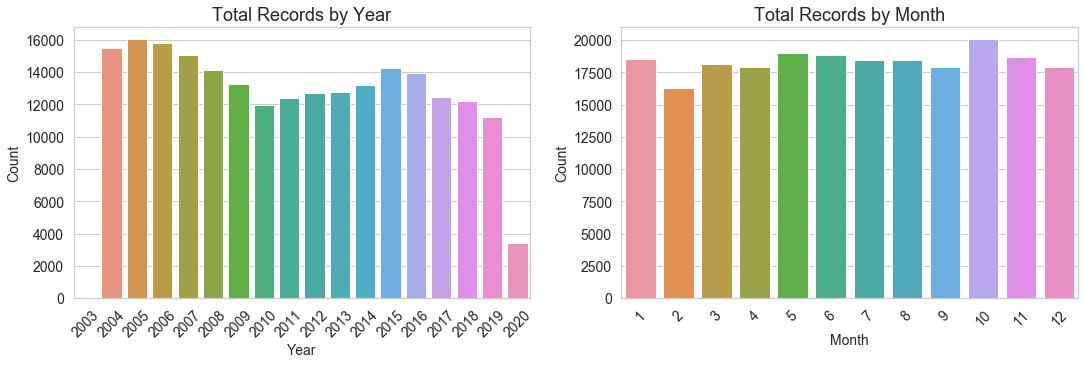

In [8]:
# explores records over time
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
sns.countplot(df['INCDTTM'].dt.year).set(title='Total Records by Year', 
                                                ylabel='Count', xlabel='Year')
plt.xticks(rotation=45)

plt.subplot(1,2,2)
sns.countplot(df['INCDTTM'].dt.month).set(title='Total Records by Month', 
                                                ylabel='Count', xlabel='Month')
plt.xticks(rotation=45);

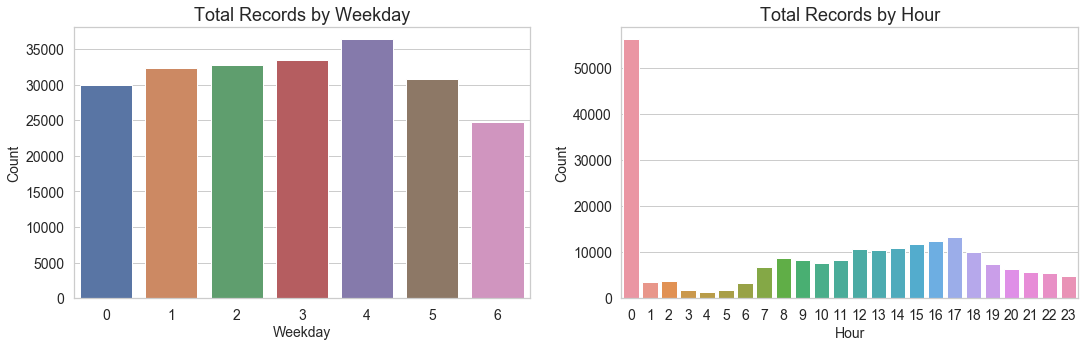

In [9]:
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
sns.countplot(df['INCDTTM'].dt.weekday).set(title='Total Records by Weekday', 
                                                ylabel='Count', xlabel='Weekday') # Week starts on 0 - Monday
plt.subplot(1,2,2)
sns.countplot(df['INCDTTM'].dt.hour).set(title='Total Records by Hour', 
                                                ylabel='Count', xlabel='Hour');

In [10]:
df[df['INCDTTM'].dt.hour==0]['INCDTTM'] # many of the rows are missing a time

0        2019-11-16
3        2006-06-03
4        2004-11-10
5        2013-03-13
8        2013-03-24
            ...    
220300   2020-01-03
220305   2019-12-31
220311   2020-02-15
220321   2019-12-05
220334   2019-12-12
Name: INCDTTM, Length: 56171, dtype: datetime64[ns]

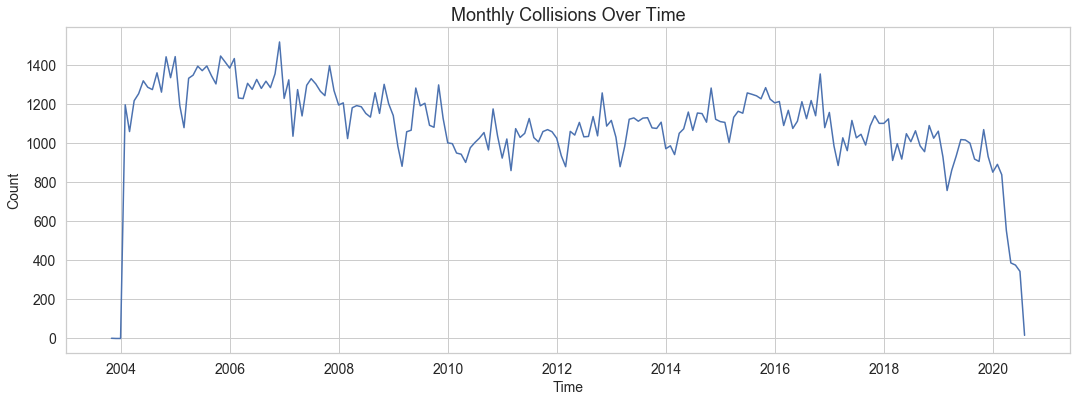

In [11]:
plt.figure(figsize=(18,6))
plt.plot(df.set_index('INCDTTM').resample('M')['REPORTNO'].count())
plt.title('Monthly Collisions Over Time')
plt.xlabel('Time')
plt.ylabel('Count');

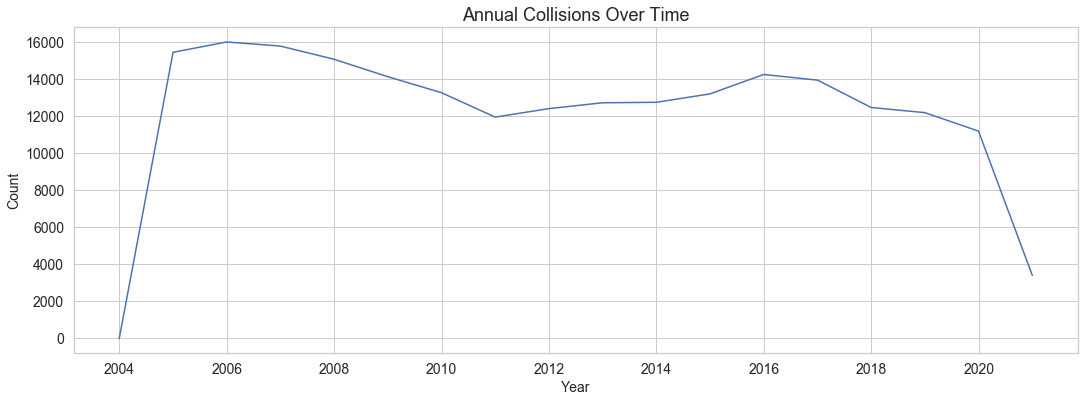

In [12]:
plt.figure(figsize=(18,6))
plt.plot(df.set_index('INCDTTM').resample('Y')['REPORTNO'].count())
plt.title('Annual Collisions Over Time')
plt.xlabel('Year')
plt.ylabel('Count');

In [13]:
# stores monthly collisions, 2004-2019
monthly_collisions = df[~df['INCDTTM'].dt.year.isin([2003, 2020])].set_index(
    'INCDTTM').resample('M')['REPORTNO'].count().reset_index()

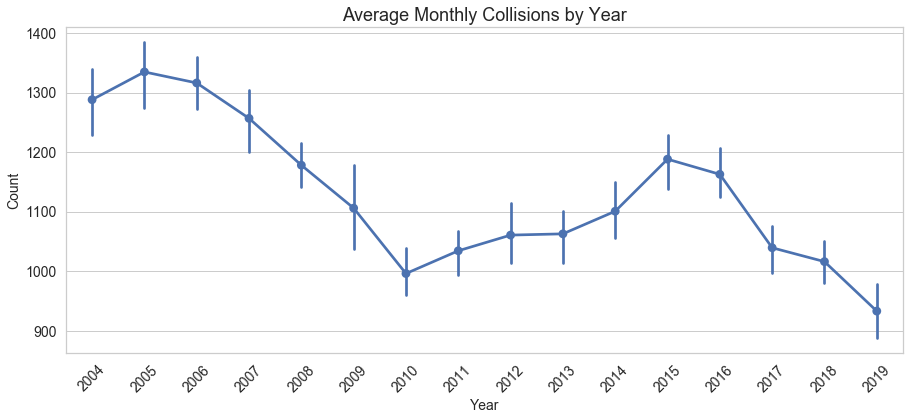

In [14]:
plt.figure(figsize=(15,6))
sns.pointplot(x=monthly_collisions['INCDTTM'].dt.year , y=monthly_collisions['REPORTNO']).set(
    title='Average Monthly Collisions by Year', xlabel='Year', ylabel='Count')
plt.xticks(rotation=45);

In [15]:
# defines function to plot categories in columns of interest
def plot_col(col):
    sns.countplot(df[col])
    plt.title(col + ' (' + str(round(((df[col].isna().sum()) / (len(df)))*100)) + '% null)')
    plt.ylabel('Total Records')
    plt.xticks(rotation=45);

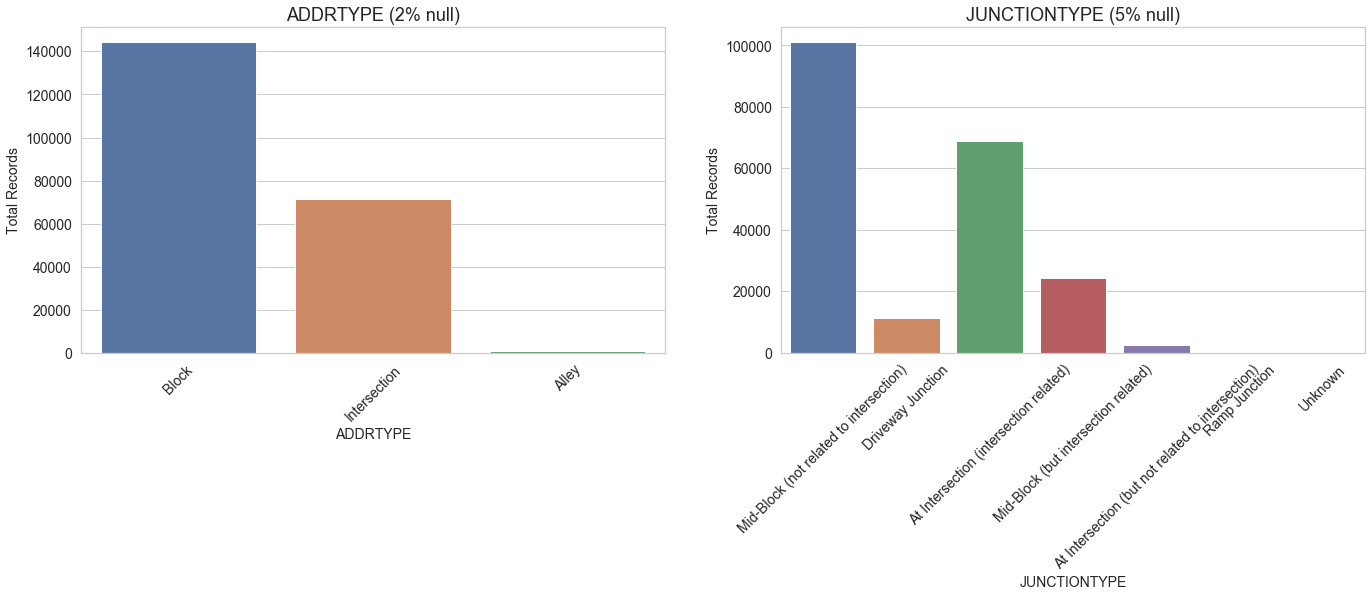

In [16]:
# physical location
plt.figure(figsize=(23,6))
plt.subplot(1,2,1)
plot_col('ADDRTYPE')

plt.subplot(1,2,2)
plot_col('JUNCTIONTYPE')

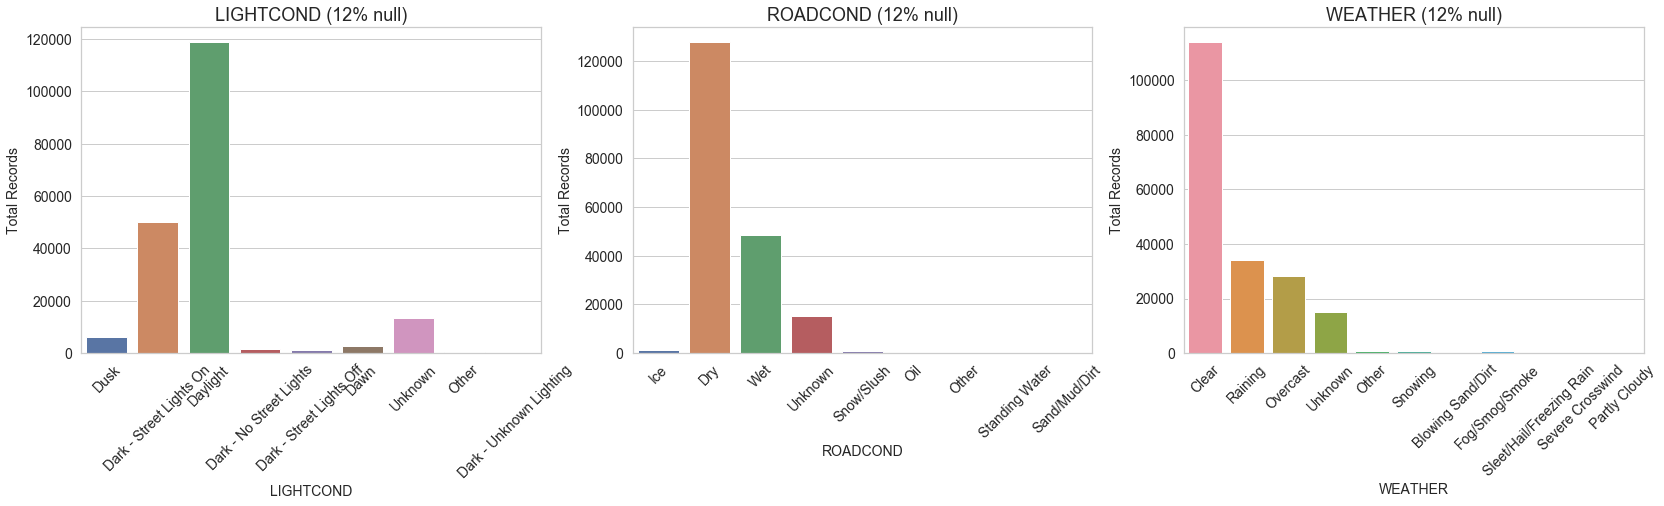

In [17]:
# conditions
plt.figure(figsize=(28,6))
plt.subplot(1,3,1)
plot_col('LIGHTCOND')

plt.subplot(1,3,2)
plot_col('ROADCOND')

plt.subplot(1,3,3)
plot_col('WEATHER')

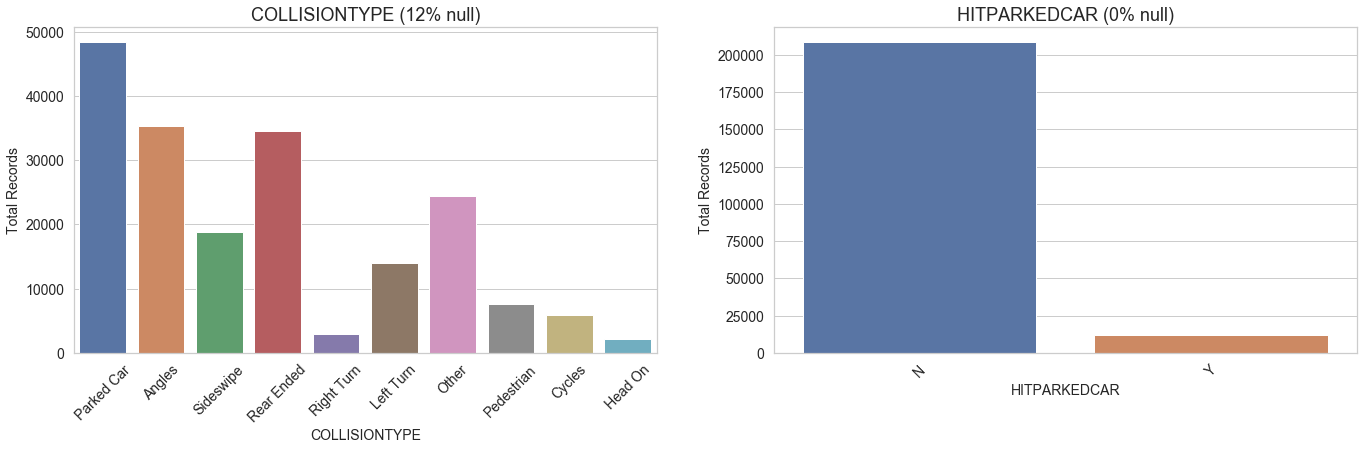

In [18]:
# collision type
plt.figure(figsize=(23,6))

plt.subplot(1,2,1)
plot_col('COLLISIONTYPE')

plt.subplot(1,2,2)
plot_col('HITPARKEDCAR')

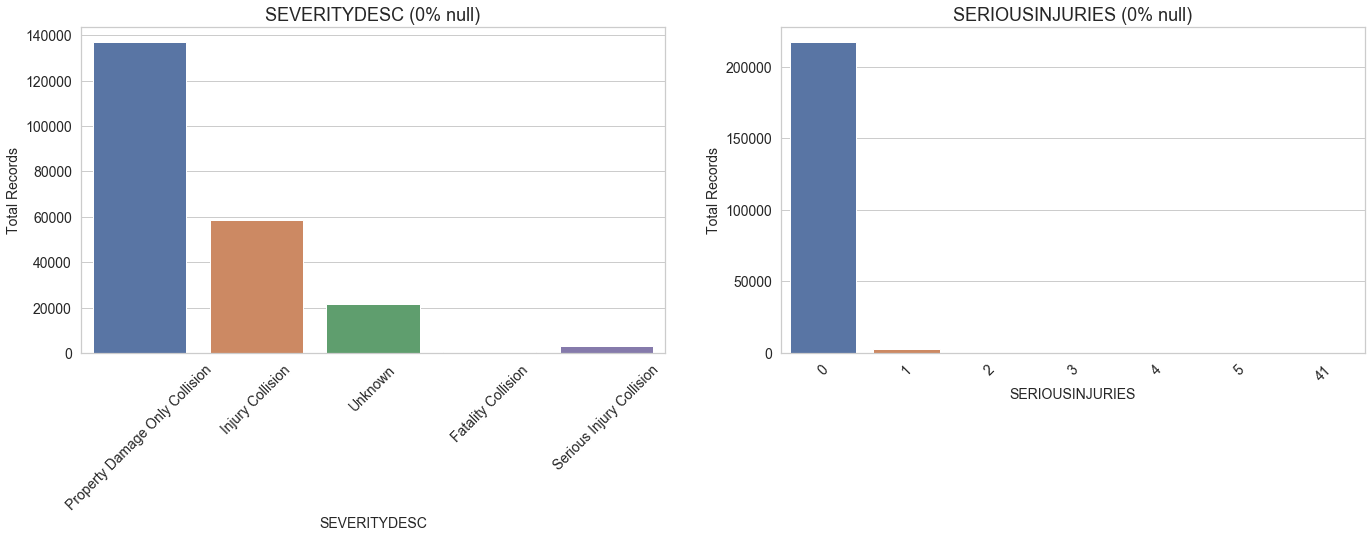

In [19]:
# severity
plt.figure(figsize=(23,6))
plt.subplot(1,2,1)
plot_col('SEVERITYDESC')

plt.subplot(1,2,2)
plot_col('SERIOUSINJURIES')

In [20]:
# defines function to number severity (2b to 2.5)
def number_severity(code):
    if code in ('0','1','2','3'):
        return code
    elif code == '2b':
        return 2.5
    return np.nan

In [21]:
# applies and assigns float type
df['severity_num'] = df['SEVERITYCODE'].apply(number_severity)
df['severity_num'] = df['severity_num'].astype('float')

In [22]:
# checks a sample
df[['severity_num', 'SEVERITYCODE']].sample(5)

,severity_num,SEVERITYCODE
55499,1.0,1
22840,1.0,1
191316,1.0,1
71439,1.0,1
158784,2.0,2


In [23]:
# stores dataframe with full years (excludes 2003 and 2020)
full_df = df[~df['INCDTTM'].dt.year.isin([2003, 2020])]

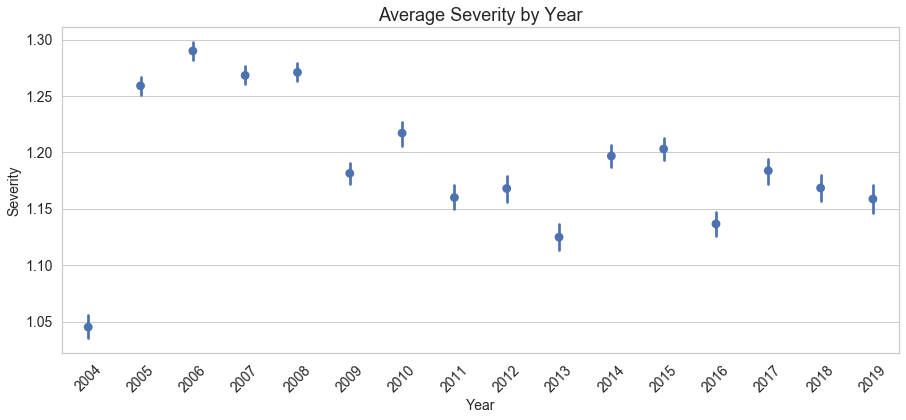

In [24]:
plt.figure(figsize=(15,6))
sns.pointplot(x=full_df['INCDTTM'].dt.year, y=full_df['severity_num'], join=False).set(
    title='Average Severity by Year', xlabel='Year', ylabel='Severity')
plt.xticks(rotation=45);

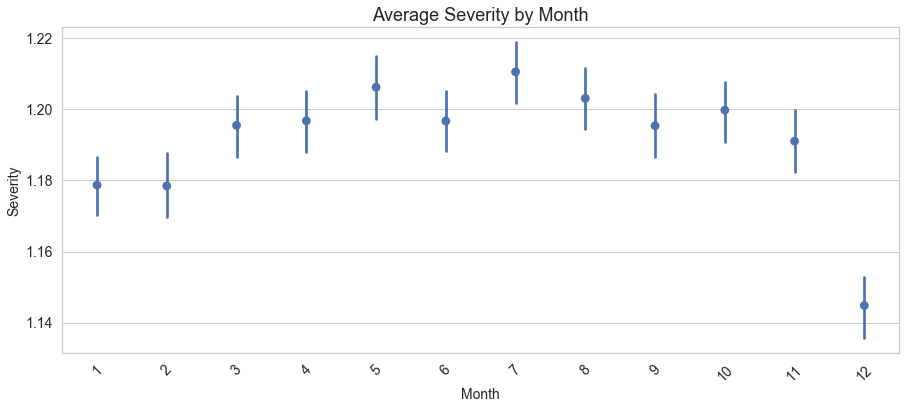

In [25]:
plt.figure(figsize=(15,6))
sns.pointplot(x=df['INCDTTM'].dt.month, y=df['severity_num'], join=False).set(
    title='Average Severity by Month', xlabel='Month', ylabel='Severity')
plt.xticks(rotation=45);

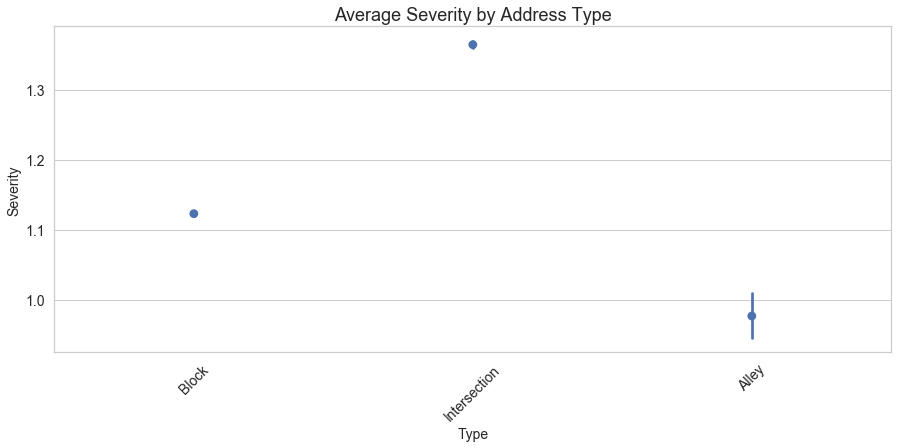

In [26]:
plt.figure(figsize=(15,6))
sns.pointplot(x='ADDRTYPE' , y='severity_num', data=df, join=False).set(
    title='Average Severity by Address Type', xlabel='Type', ylabel='Severity')
plt.xticks(rotation=45);

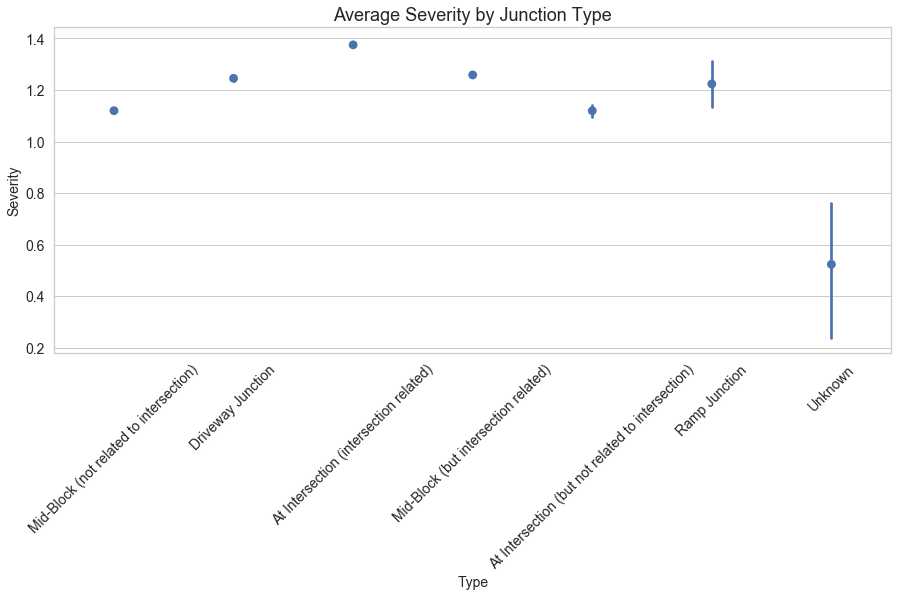

In [27]:
plt.figure(figsize=(15,6))
sns.pointplot(x='JUNCTIONTYPE' , y='severity_num', data=df, join=False).set(
    title='Average Severity by Junction Type', xlabel='Type', ylabel='Severity')
plt.xticks(rotation=45);

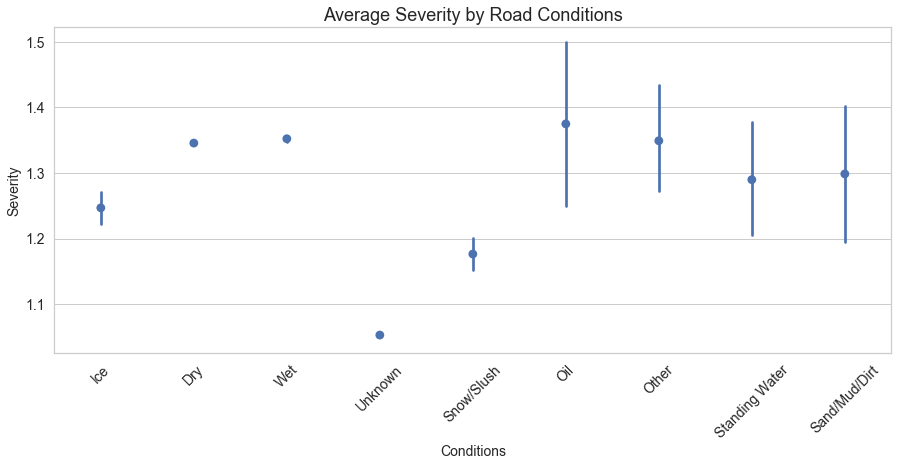

In [28]:
plt.figure(figsize=(15,6))
sns.pointplot(x='ROADCOND' , y='severity_num', data=df, join=False).set(
    title='Average Severity by Road Conditions', xlabel='Conditions', ylabel='Severity')
plt.xticks(rotation=45);

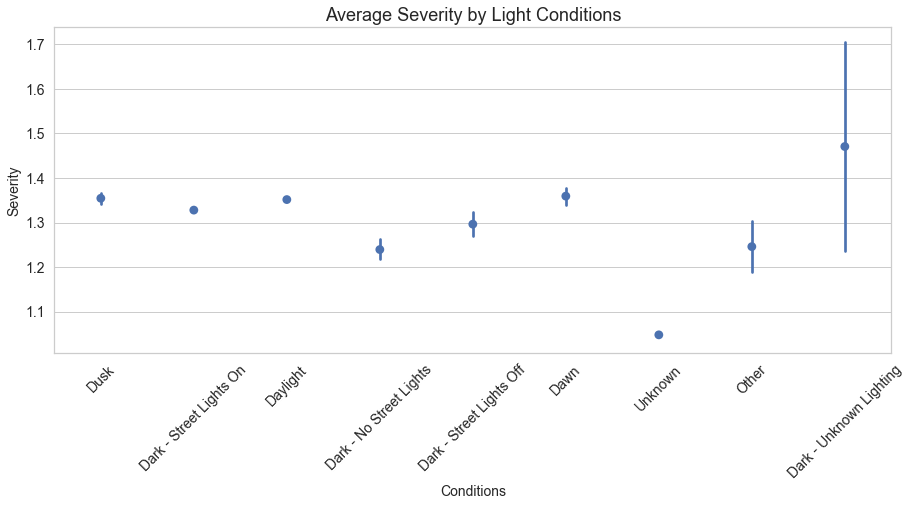

In [29]:
plt.figure(figsize=(15,6))
sns.pointplot(x='LIGHTCOND' , y='severity_num', data=df, join=False).set(
    title='Average Severity by Light Conditions', xlabel='Conditions', ylabel='Severity')
plt.xticks(rotation=45);

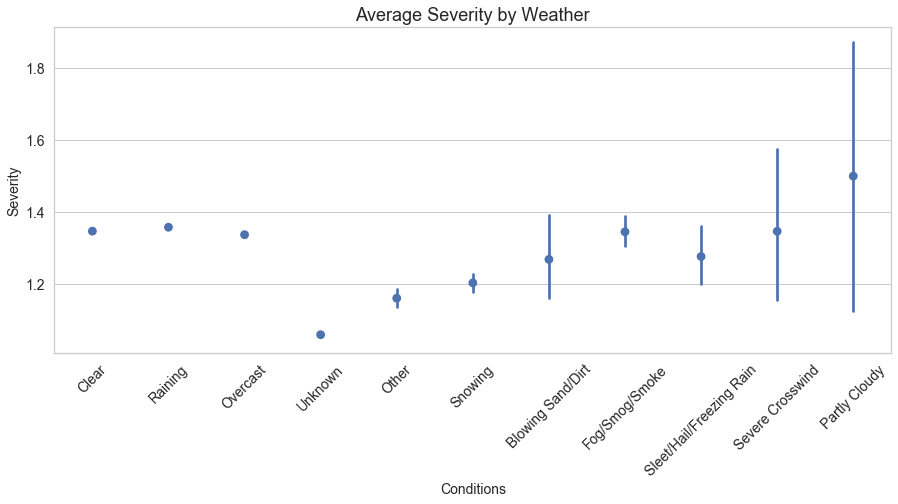

In [30]:
plt.figure(figsize=(15,6))
sns.pointplot(x='WEATHER' , y='severity_num', data=df, join=False).set(
    title='Average Severity by Weather', xlabel='Conditions', ylabel='Severity')
plt.xticks(rotation=45);

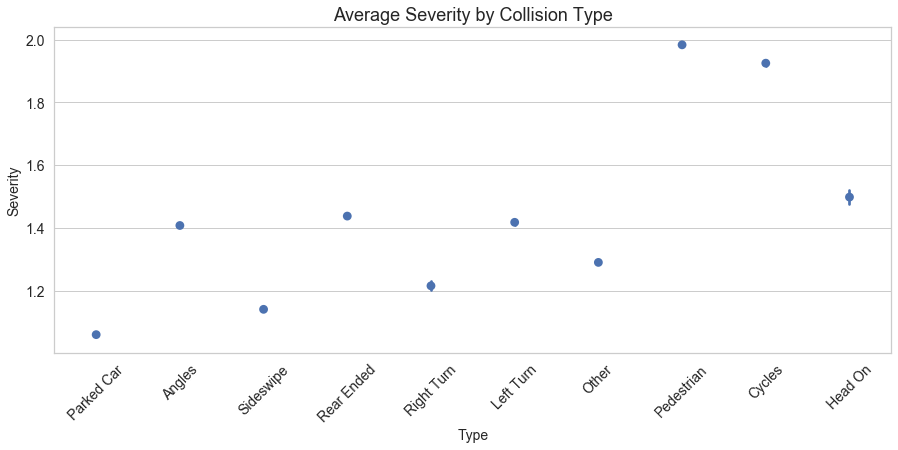

In [31]:
plt.figure(figsize=(15,6))
sns.pointplot(x='COLLISIONTYPE' , y='severity_num', data=df, join=False).set(
    title='Average Severity by Collision Type', xlabel='Type', ylabel='Severity')
plt.xticks(rotation=45);

In [32]:
# exploring records where x and y coordinates are null
df[['X', 'Y']].isna().sum()

X    7460
Y    7460
dtype: int64

In [33]:
# stores records where longitude/latitude are null
loc_nulls = df[df['X'].isna()==True]

In [34]:
loc_nulls[['X', 'Y']].isna().sum()

X    7460
Y    7460
dtype: int64

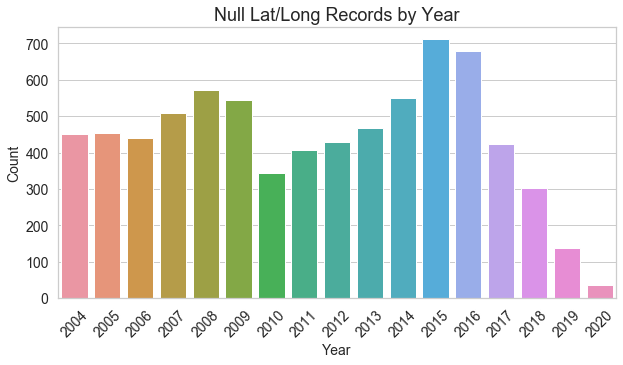

In [35]:
plt.figure(figsize=(10,5))
sns.countplot(loc_nulls['INCDTTM'].dt.year).set(title='Null Lat/Long Records by Year', 
                                                ylabel='Count', xlabel='Year')
plt.xticks(rotation=45);

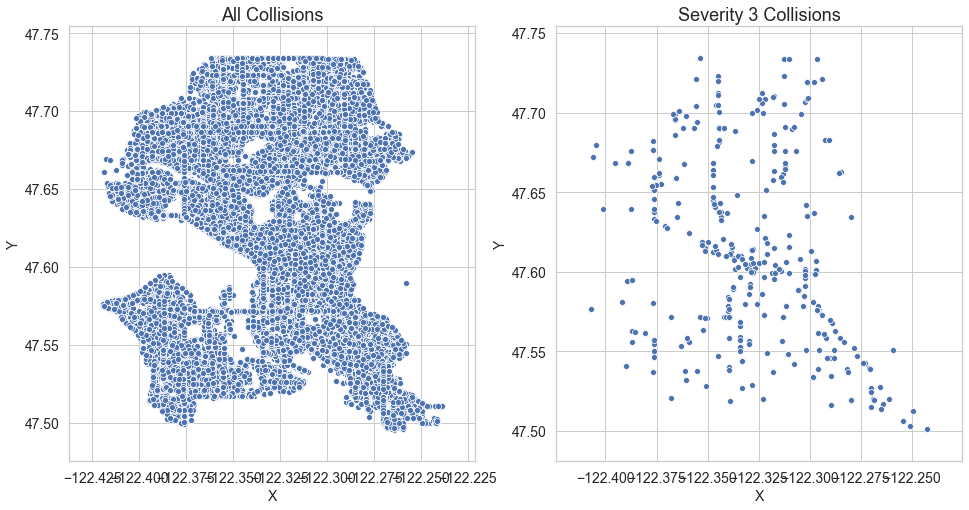

In [36]:
# plotting collisions and severity by latitude and longitude
plt.figure(figsize=(16,8))

plt.subplot(1,2,1)
sns.scatterplot(x = 'X', y='Y', data=df)
plt.title('All Collisions')

plt.subplot(1,2,2)
sns.scatterplot(x = 'X', y='Y', data=df[df['severity_num']== 3])
plt.title('Severity 3 Collisions');

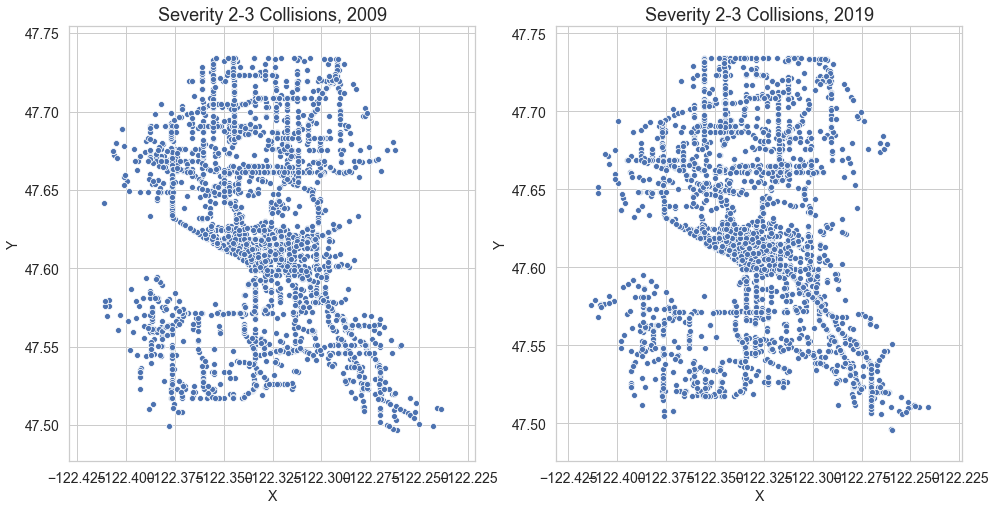

In [37]:
plt.figure(figsize=(16,8))

plt.subplot(1,2,1)
sns.scatterplot(x = 'X', y='Y', data=df[(df['INCDTTM'].dt.year == 2009) & (df['severity_num'] > 1)])
plt.title('Severity 2-3 Collisions, 2009')

plt.subplot(1,2,2)
sns.scatterplot(x = 'X', y='Y', data=df[(df['INCDTTM'].dt.year == 2019) & (df['severity_num'] > 1)])
plt.title('Severity 2-3 Collisions, 2019');

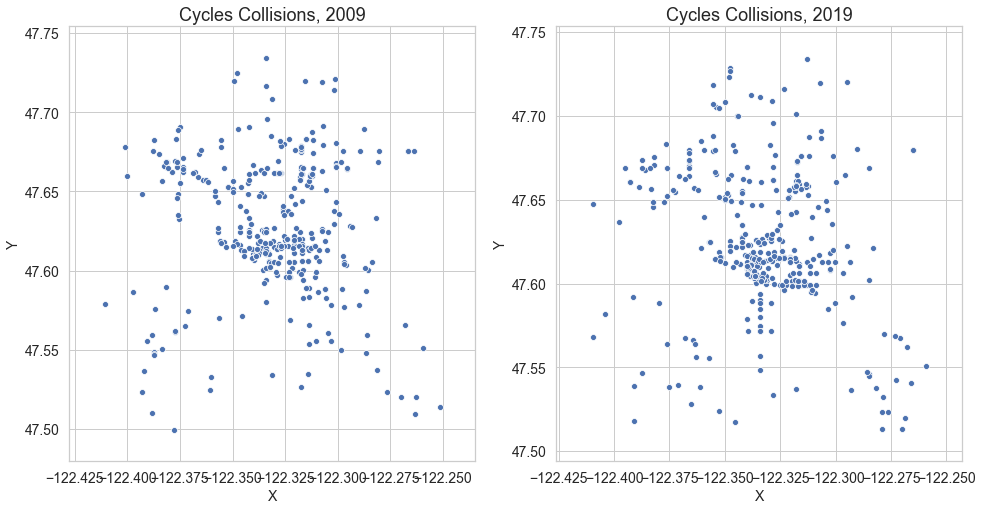

In [38]:
plt.figure(figsize=(16,8))

plt.subplot(1,2,1)
sns.scatterplot(x = 'X', y='Y', data=df[(df['INCDTTM'].dt.year == 2009) & (df['COLLISIONTYPE'] == 'Cycles')])
plt.title('Cycles Collisions, 2009')

plt.subplot(1,2,2)
sns.scatterplot(x = 'X', y='Y', data=df[(df['INCDTTM'].dt.year == 2019) & (df['COLLISIONTYPE'] == 'Cycles')])
plt.title('Cycles Collisions, 2019');

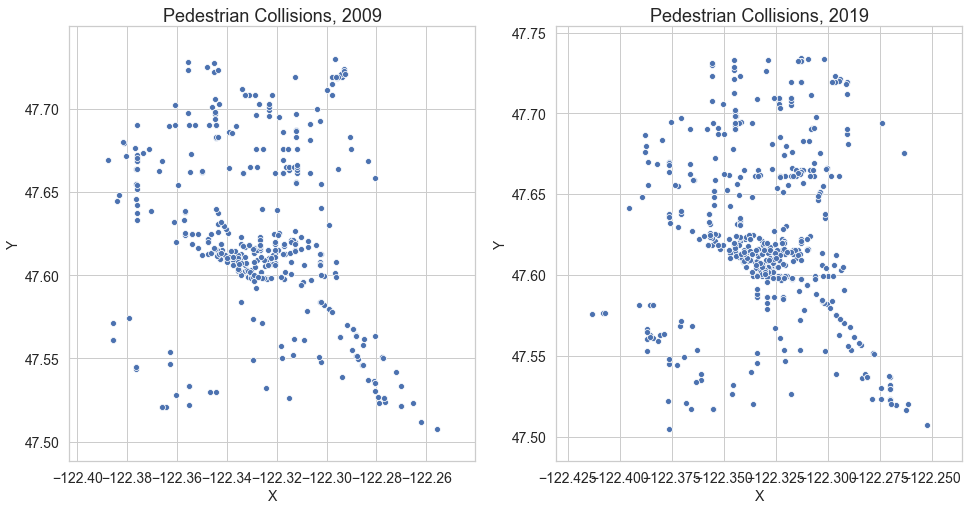

In [39]:
plt.figure(figsize=(16,8))

plt.subplot(1,2,1)
sns.scatterplot(x = 'X', y='Y', data=df[(df['INCDTTM'].dt.year == 2009) & (df['COLLISIONTYPE'] == 'Pedestrian')])
plt.title('Pedestrian Collisions, 2009')

plt.subplot(1,2,2)
sns.scatterplot(x = 'X', y='Y', data=df[(df['INCDTTM'].dt.year == 2019) & (df['COLLISIONTYPE'] == 'Pedestrian')])
plt.title('Pedestrian Collisions, 2019');

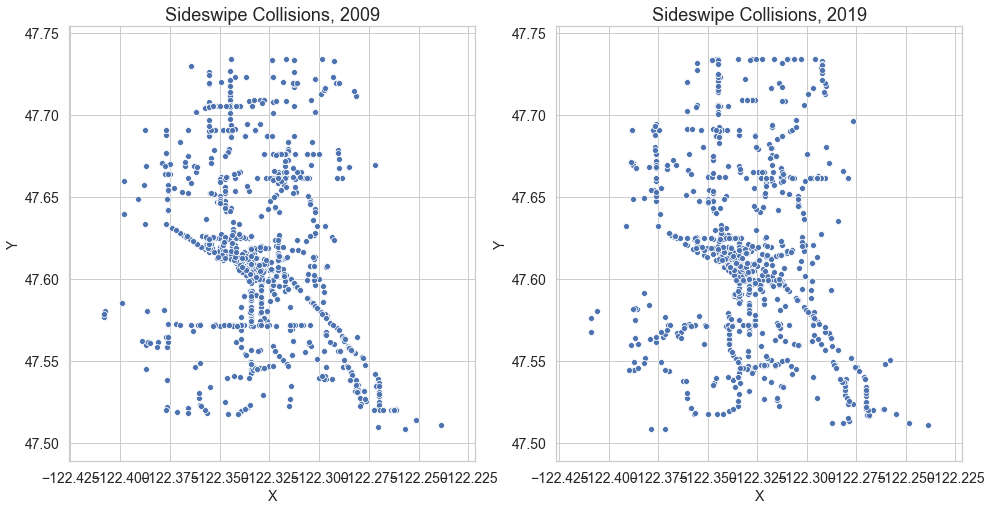

In [40]:
plt.figure(figsize=(16,8))

plt.subplot(1,2,1)
sns.scatterplot(x = 'X', y='Y', data=df[(df['INCDTTM'].dt.year == 2009) & (df['COLLISIONTYPE'] == 'Sideswipe')])
plt.title('Sideswipe Collisions, 2009')

plt.subplot(1,2,2)
sns.scatterplot(x = 'X', y='Y', data=df[(df['INCDTTM'].dt.year == 2019) & (df['COLLISIONTYPE'] == 'Sideswipe')])
plt.title('Sideswipe Collisions, 2019');

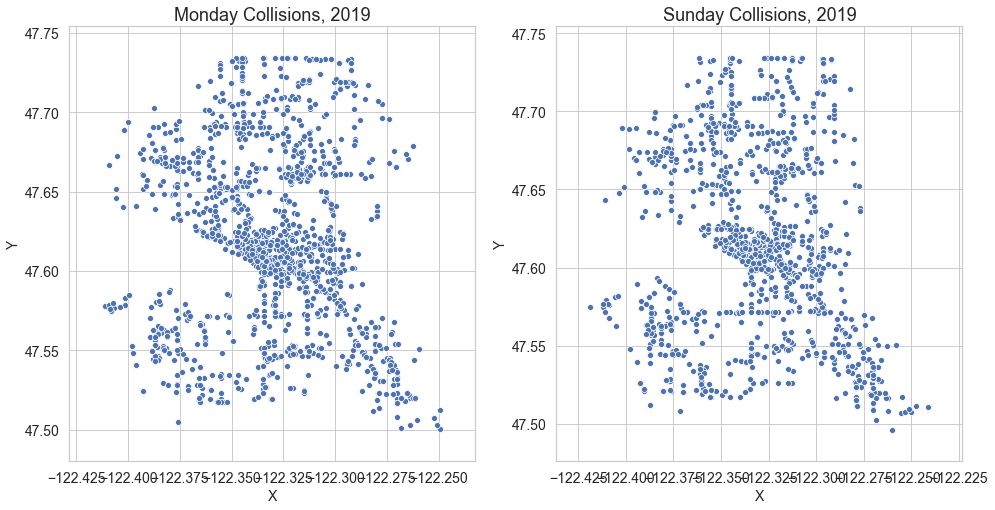

In [41]:
plt.figure(figsize=(16,8))

plt.subplot(1,2,1)
sns.scatterplot(x = 'X', y='Y', data=df[(df['INCDTTM'].dt.year == 2019) & (df['INCDTTM'].dt.weekday == 0)])
plt.title('Monday Collisions, 2019')

plt.subplot(1,2,2)
sns.scatterplot(x = 'X', y='Y', data=df[(df['INCDTTM'].dt.year == 2019) & (df['INCDTTM'].dt.weekday == 6)])
plt.title('Sunday Collisions, 2019');

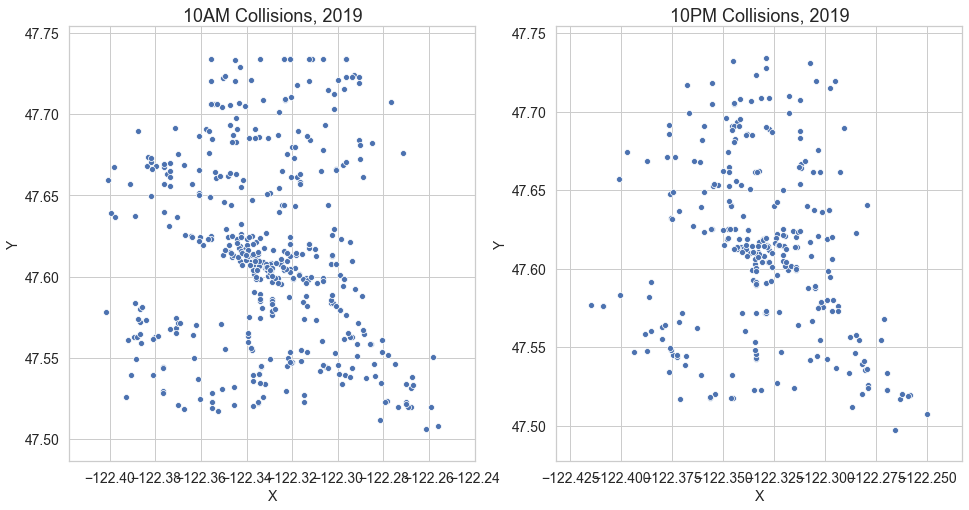

In [42]:
plt.figure(figsize=(16,8))

plt.subplot(1,2,1)
sns.scatterplot(x = 'X', y='Y', data=df[(df['INCDTTM'].dt.year == 2019) & (df['INCDTTM'].dt.hour == 10)])
plt.title('10AM Collisions, 2019')

plt.subplot(1,2,2)
sns.scatterplot(x = 'X', y='Y', data=df[(df['INCDTTM'].dt.year == 2019) & (df['INCDTTM'].dt.hour == 22)])
plt.title('10PM Collisions, 2019');

In [43]:
# stores dataframe with severity 2b, 3
severe_df = df[df['SEVERITYCODE'].isin(['2b', '3'])]

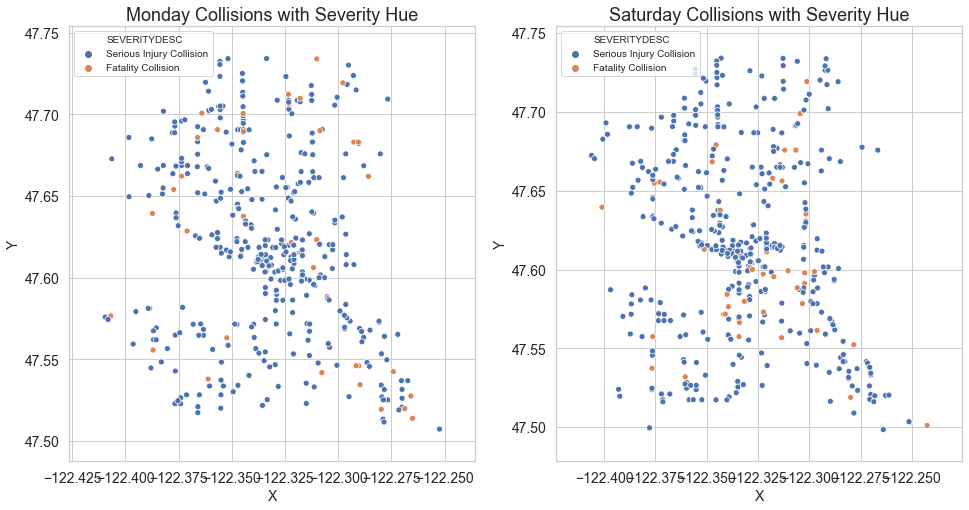

In [44]:
plt.figure(figsize=(16,8))

plt.subplot(1,2,1)
sns.scatterplot(x = 'X', y='Y', data=severe_df[severe_df['INCDTTM'].dt.weekday == 0], hue = 'SEVERITYDESC')
plt.title('Monday Collisions with Severity Hue')
plt.legend(loc='upper left', fontsize=10)

plt.subplot(1,2,2)
sns.scatterplot(x = 'X', y='Y', data=severe_df[severe_df['INCDTTM'].dt.weekday == 5], hue = 'SEVERITYDESC')
plt.title('Saturday Collisions with Severity Hue')
plt.legend(loc='upper left', fontsize=10);

In [46]:
# stores total collisions per coordinate
counts = df.groupby(['X','Y'])['REPORTNO'].count().sort_values()
counts_df = pd.DataFrame(counts).reset_index()
counts_df.rename(columns={'REPORTNO': 'total'}, inplace=True)
counts_df

,X,Y,total
0,-122.419091,47.575133,1
1,-122.331920,47.544050,1
2,-122.265419,47.514089,1
3,-122.265439,47.507905,1
4,-122.331775,47.666834,1
...,...,...,...
24923,-122.299160,47.579673,255
24924,-122.344997,47.725036,269
24925,-122.328079,47.604161,272
24926,-122.344896,47.717173,280


In [47]:
counts_df['total'].describe().round(2)

count    24928.00
mean         8.54
std         14.61
min          1.00
25%          2.00
50%          3.00
75%          9.00
max        295.00
Name: total, dtype: float64

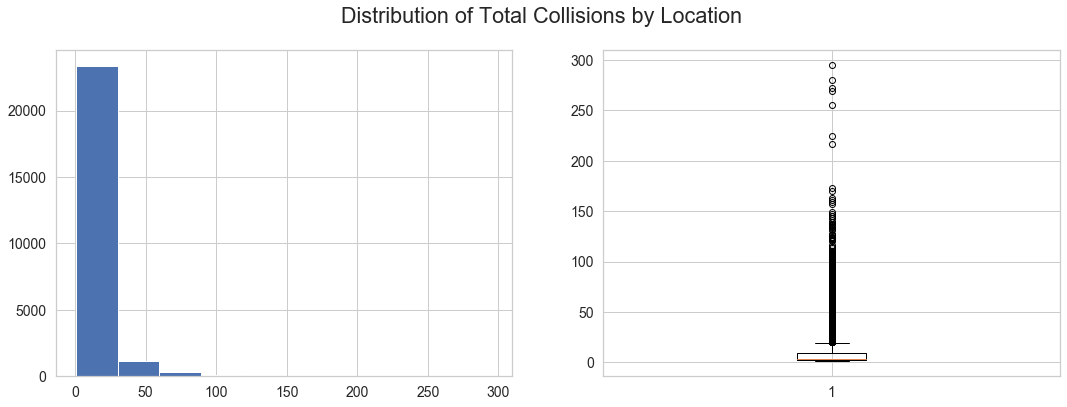

In [48]:
plt.figure(figsize=(18,6))
plt.suptitle('Distribution of Total Collisions by Location')

plt.subplot(1,2,1)
plt.hist(counts_df['total'])

plt.subplot(1,2,2)
plt.boxplot(counts_df['total']);

In [49]:
# stores total accidents severity 2-3 by coordinates
severe_counts = df[df['severity_num']>1].groupby(['X','Y'])['REPORTNO'].count().sort_values()

In [50]:
severe_counts_df = pd.DataFrame(severe_counts).reset_index()
severe_counts_df.rename(columns={'REPORTNO': 'total'}, inplace=True)
severe_counts_df

,X,Y,total
0,-122.417113,47.577302,1
1,-122.333173,47.689562,1
2,-122.333199,47.608926,1
3,-122.333203,47.682888,1
4,-122.333262,47.592395,1
...,...,...,...
12683,-122.332653,47.708655,96
12684,-122.344997,47.725036,96
12685,-122.299160,47.579673,97
12686,-122.328079,47.604161,112


In [51]:
severe_counts_df['total'].describe().round(2)

count    12688.00
mean         4.79
std          6.94
min          1.00
25%          1.00
50%          2.00
75%          5.00
max        126.00
Name: total, dtype: float64

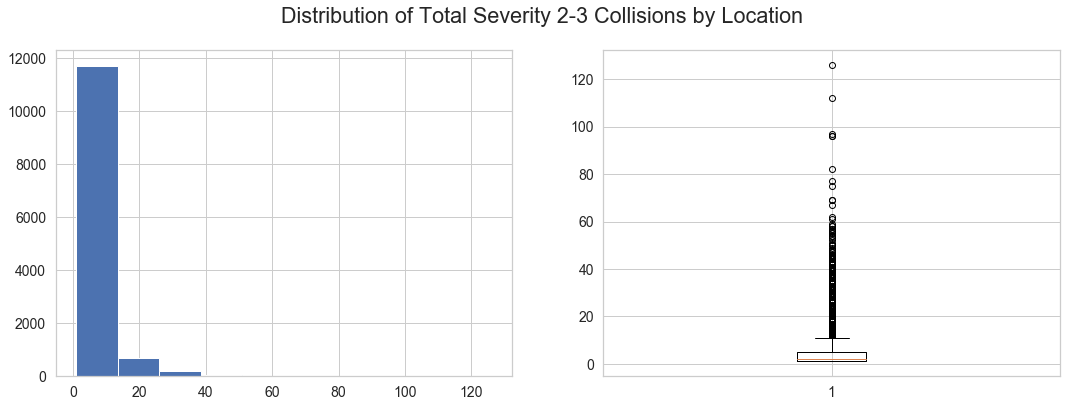

In [52]:
plt.figure(figsize=(18,6))
plt.suptitle('Distribution of Total Severity 2-3 Collisions by Location')

plt.subplot(1,2,1)
plt.hist(severe_counts_df['total'])

plt.subplot(1,2,2)
plt.boxplot(severe_counts_df['total']);

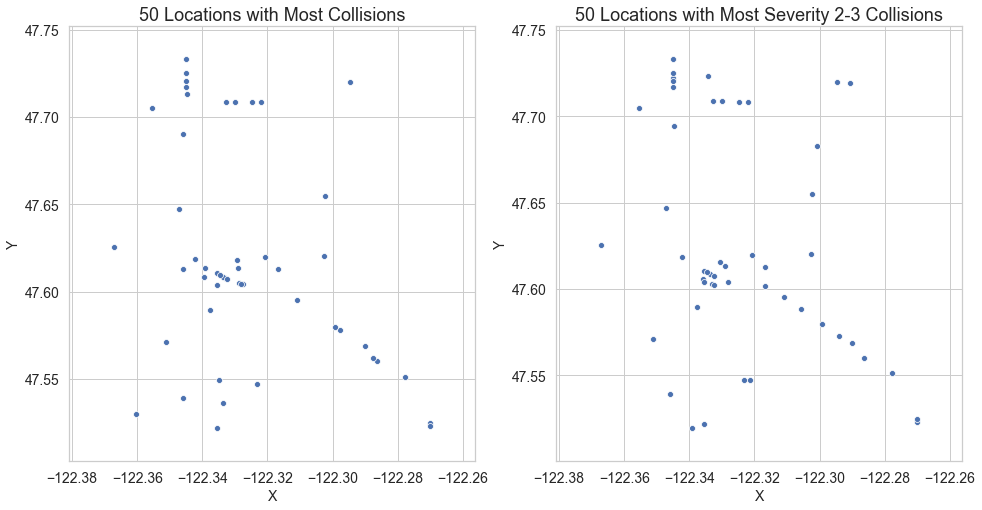

In [53]:
# plotting 100 coordinates with most collisions
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.scatterplot(x = 'X', y='Y', data=counts_df.tail(50))
plt.title('50 Locations with Most Collisions')

plt.subplot(1,2,2)
sns.scatterplot(x = 'X', y='Y', data=severe_counts_df.tail(50))
plt.title('50 Locations with Most Severity 2-3 Collisions');

# Plotting Collisions w ArcGIS

In [54]:
from arcgis import *

/Users/ellenpaigehoffman/opt/anaconda3/lib/python3.7/site-packages/arcgis/features/_data/geodataset/utils.py:16: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  pd.datetime,


In [55]:
gis = GIS()

In [56]:
# calls map of Seattle
m1 = gis.map('Seattle')
m1

MapView(layout=Layout(height='400px', width='100%'))

In [57]:
# adds 20 locations with most collisions, circle size by total collisions
lyr1 = gis.content.import_data(counts_df.tail(20))
m1.add_layer(lyr1, {'renderer': 'ClassedSizeRender', 'field_name': 'total'}) 

In [58]:
# prints available basemaps
m1.basemaps

['dark-gray',
 'dark-gray-vector',
 'gray',
 'gray-vector',
 'hybrid',
 'national-geographic',
 'oceans',
 'osm',
 'satellite',
 'streets',
 'streets-navigation-vector',
 'streets-night-vector',
 'streets-relief-vector',
 'streets-vector',
 'terrain',
 'topo',
 'topo-vector']

In [59]:
# updates basemap
m1.basemap = 'streets'

In [60]:
# prints another map
m2 = gis.map('Seattle')
m2.basemap = 'streets'
m2

MapView(layout=Layout(height='400px', width='100%'))

In [62]:
# adds heatmap with top 100 locations for collisions
lyr2 = gis.content.import_data(counts_df.tail(100))
m2.add_layer(lyr2, {'renderer':'HeatmapRenderer', 'field_name': 'total', 'opacity':0.7})

# Exploring Traffic Circles
Documentation: https://www.seattle.gov/Documents/Departments/SDOT/GIS/Traffic_Circles_OD.pdf
 *INTKEY should map to the collisions dataset*

In [66]:
# imports data from city data portal
url = 'http://data-seattlecitygis.opendata.arcgis.com/datasets/717b10434d4945658355eba78b66971a_6.csv?outSR={%22latestWkid%22:2926,%22wkid%22:2926}'
circles_df = pd.read_csv(url)

In [67]:
circles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1066 entries, 0 to 1065
Data columns (total 32 columns):
X                            1066 non-null float64
Y                            1066 non-null float64
OBJECTID                     1066 non-null int64
COMPKEY                      1066 non-null int64
UNITID                       1066 non-null object
UNITDESC                     1066 non-null object
CONDITION                    1066 non-null object
CONDITION_ASSESSMENT_DATE    1066 non-null object
CURRENT_STATUS               1066 non-null object
OWNERSHIP                    1066 non-null object
PRIMARYDISTRICTCD            1066 non-null object
SECONDARYDISTRICTCD          1066 non-null object
COMPTYPE                     1066 non-null int64
CURRENT_STATUS_DATE          1066 non-null object
INSTALL_DATE                 1066 non-null object
INSTALL_PURPOSE              1066 non-null object
INTKEY                       1066 non-null int64
LANDSCAPING                  1066 non-null ob

In [68]:
# drops columns with no values
circles_df.drop(['MAINTENANCE_AGREEMENT', 'OVERRIDECOMMENT'], axis=1, inplace=True)

In [69]:
# updates date column types
circles_df['CONDITION_ASSESSMENT_DATE'] = pd.to_datetime(circles_df['CONDITION_ASSESSMENT_DATE'])
circles_df['CURRENT_STATUS_DATE'] = pd.to_datetime(circles_df['CURRENT_STATUS_DATE'])
circles_df['INSTALL_DATE'] = pd.to_datetime(circles_df['INSTALL_DATE'])
circles_df['OWNERSHIP_DATE'] = pd.to_datetime(circles_df['OWNERSHIP_DATE'])

In [85]:
# replaces blanks with null
circles_df = circles_df.replace(r'^\s*$', np.nan, regex=True)

In [89]:
circles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1066 entries, 0 to 1065
Data columns (total 30 columns):
X                            1066 non-null float64
Y                            1066 non-null float64
OBJECTID                     1066 non-null int64
COMPKEY                      1066 non-null int64
UNITID                       1066 non-null object
UNITDESC                     1066 non-null object
CONDITION                    1063 non-null object
CONDITION_ASSESSMENT_DATE    1066 non-null datetime64[ns, UTC]
CURRENT_STATUS               1063 non-null object
OWNERSHIP                    1042 non-null object
PRIMARYDISTRICTCD            1066 non-null object
SECONDARYDISTRICTCD          11 non-null object
COMPTYPE                     1066 non-null int64
CURRENT_STATUS_DATE          1066 non-null datetime64[ns, UTC]
INSTALL_DATE                 1066 non-null datetime64[ns, UTC]
INSTALL_PURPOSE              60 non-null object
INTKEY                       1066 non-null int64
LANDSCAPIN

In [49]:
circles_df.head()

,X,Y,OBJECTID,COMPKEY,UNITID,UNITDESC,CONDITION,CONDITION_ASSESSMENT_DATE,CURRENT_STATUS,OWNERSHIP,...,OVERRIDEYN,OWNERSHIP_DATE,SDOT_INITIATED,SEWER_ACCESS_COVER,TRCSIZE,SURVEY_MONUMENT,TRCSHAPE,UNITTYPE,SHAPE_LNG,SHAPE_LAT
0,1.258588e+06,210475.502412,1,509338,TRC-601,38TH AVE SW AND SW DAKOTA ST ...,GOOD,2009-09-15 00:00:00+00:00,INSVC,SDOT,...,N,1970-01-01 00:00:00+00:00,N,N,0,N,CRC,TRC,-122.380088,47.566489
1,1.266983e+06,260074.185342,2,509566,TRC-934,FREMONT AVE N AND N 102ND ST ...,GOOD,2009-09-09 00:00:00+00:00,INSVC,SDOT,...,N,1970-01-01 00:00:00+00:00,N,N,0,N,CRC,TRC,-122.350050,47.702894
2,1.274207e+06,254314.130296,3,508937,TRC-784,8TH AVE NE AND NE 81ST ST ...,GOOD,2009-08-03 00:00:00+00:00,INSVC,SDOT,...,N,1970-01-01 00:00:00+00:00,N,N,16,N,CRC,TRC,-122.320263,47.687493
3,1.278437e+06,217535.101459,4,509329,TRC-422,25TH AVE S AND S GRAND ST ...,GOOD,2009-09-21 00:00:00+00:00,INSVC,SDOT,...,N,1970-01-01 00:00:00+00:00,N,N,0,N,OTHER,TRC,-122.300247,47.586905
4,1.280848e+06,255438.451194,5,509639,TRC-542,32ND AVE NE AND NE 86TH ST ...,GOOD,2009-09-15 00:00:00+00:00,INSVC,SDOT,...,N,1970-01-01 00:00:00+00:00,N,N,0,N,CRC,TRC,-122.293392,47.690923


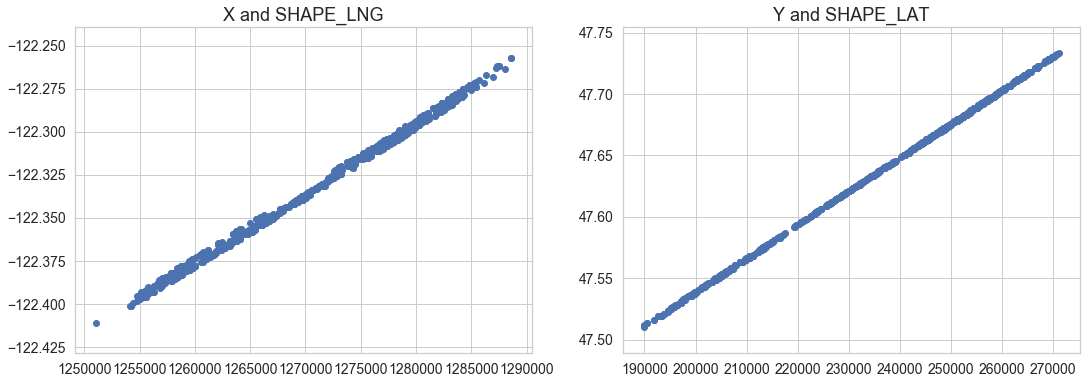

In [13]:
# confirming location markers
plt.figure(figsize = (18,6))

plt.subplot(1,2,1)
plt.scatter(circles_df.X, circles_df.SHAPE_LNG)
plt.title('X and SHAPE_LNG')

plt.subplot(1,2,2)
plt.scatter(circles_df.Y, circles_df.SHAPE_LAT)
plt.title('Y and SHAPE_LAT');

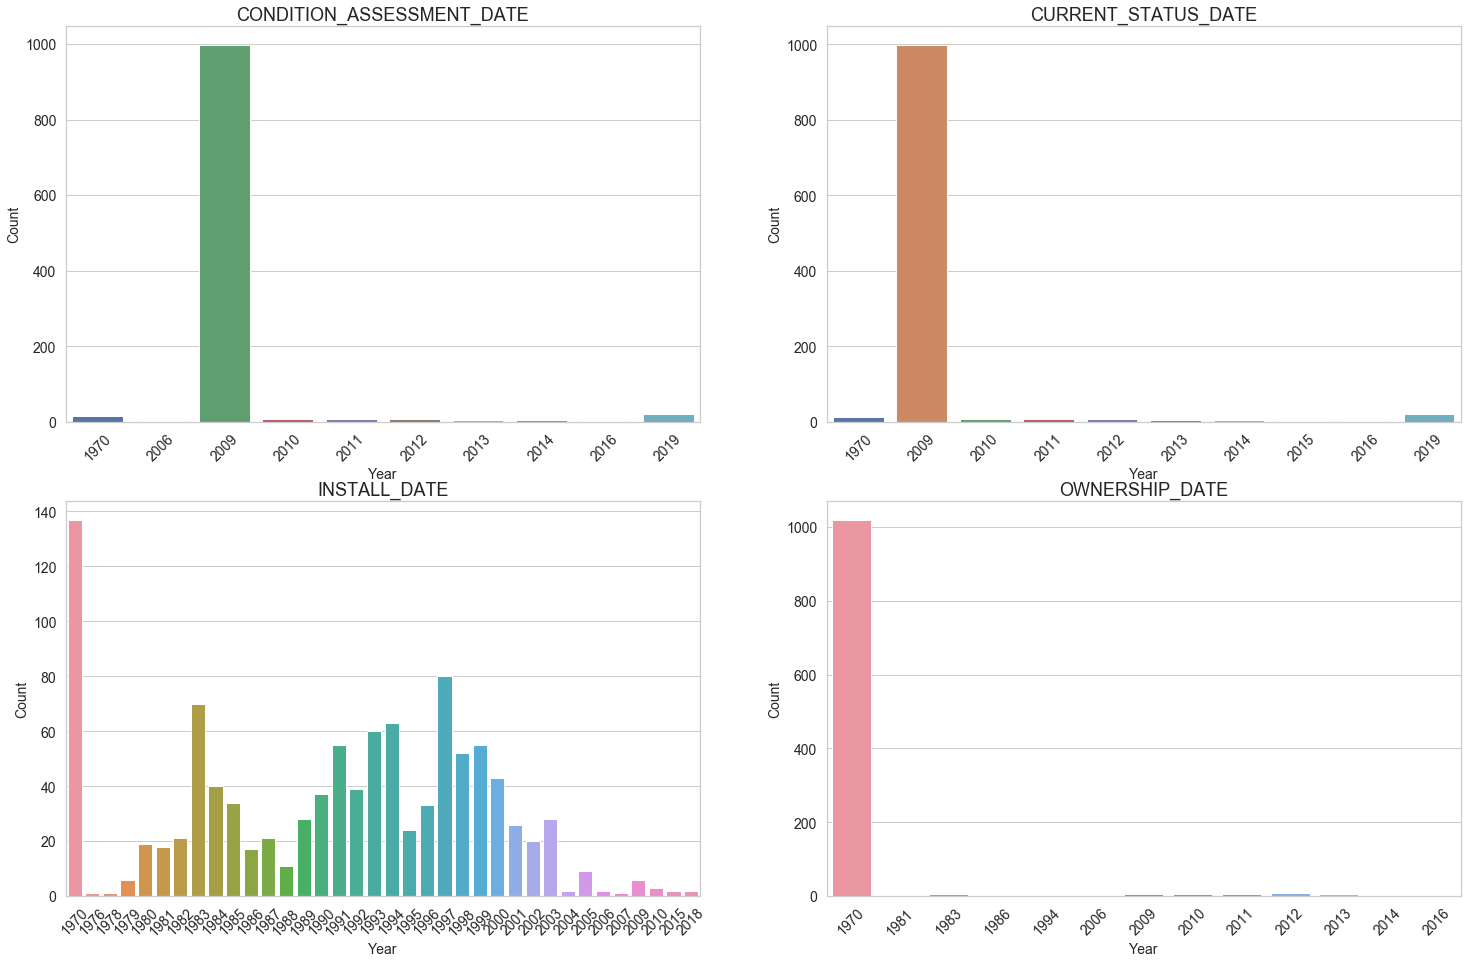

In [120]:
# exploring time variables
plt.figure(figsize=(25,16))
x=1
for i in ['CONDITION_ASSESSMENT_DATE', 'CURRENT_STATUS_DATE', 'INSTALL_DATE', 'OWNERSHIP_DATE']:
    plt.subplot(2,2,x)
    sns.countplot(circles_df.fillna('NONE')[i].dt.year)
    plt.ylabel('Count')
    plt.xlabel('Year')
    plt.title(i)
    plt.xticks(rotation=45)
    x +=1

In [125]:
# exploring object columns
for i in circles_df.columns:
    if circles_df[i].dtype == 'object':
        print(i + ':')
        print('Nulls: {}'.format(circles_df[i].isna().sum()))
        print('Unique Values: {}'.format(len(circles_df[i].unique())))
        print('---')

UNITID:
Nulls: 0
Unique Values: 1066
---
UNITDESC:
Nulls: 0
Unique Values: 1056
---
CONDITION:
Nulls: 3
Unique Values: 4
---
CURRENT_STATUS:
Nulls: 3
Unique Values: 2
---
OWNERSHIP:
Nulls: 24
Unique Values: 2
---
PRIMARYDISTRICTCD:
Nulls: 0
Unique Values: 7
---
SECONDARYDISTRICTCD:
Nulls: 1055
Unique Values: 5
---
INSTALL_PURPOSE:
Nulls: 1006
Unique Values: 5
---
LANDSCAPING:
Nulls: 0
Unique Values: 2
---
MAINTAINED_BY:
Nulls: 27
Unique Values: 2
---
NO_LAND_REASON:
Nulls: 1064
Unique Values: 3
---
OVERRIDEYN:
Nulls: 0
Unique Values: 1
---
SDOT_INITIATED:
Nulls: 0
Unique Values: 2
---
SEWER_ACCESS_COVER:
Nulls: 0
Unique Values: 2
---
SURVEY_MONUMENT:
Nulls: 0
Unique Values: 2
---
TRCSHAPE:
Nulls: 2
Unique Values: 4
---
UNITTYPE:
Nulls: 0
Unique Values: 1
---


In [115]:
# defines function to plot categories
def plot_four(a_list):
    plt.figure(figsize=(26,16))
    x=1
    for i in a_list:
        plt.subplot(2,2,x)
        sns.countplot(circles_df.fillna('NONE')[i])
        plt.ylabel('Count')
        plt.xlabel('')
        plt.title(i)
        plt.xticks(rotation=45)
        x +=1

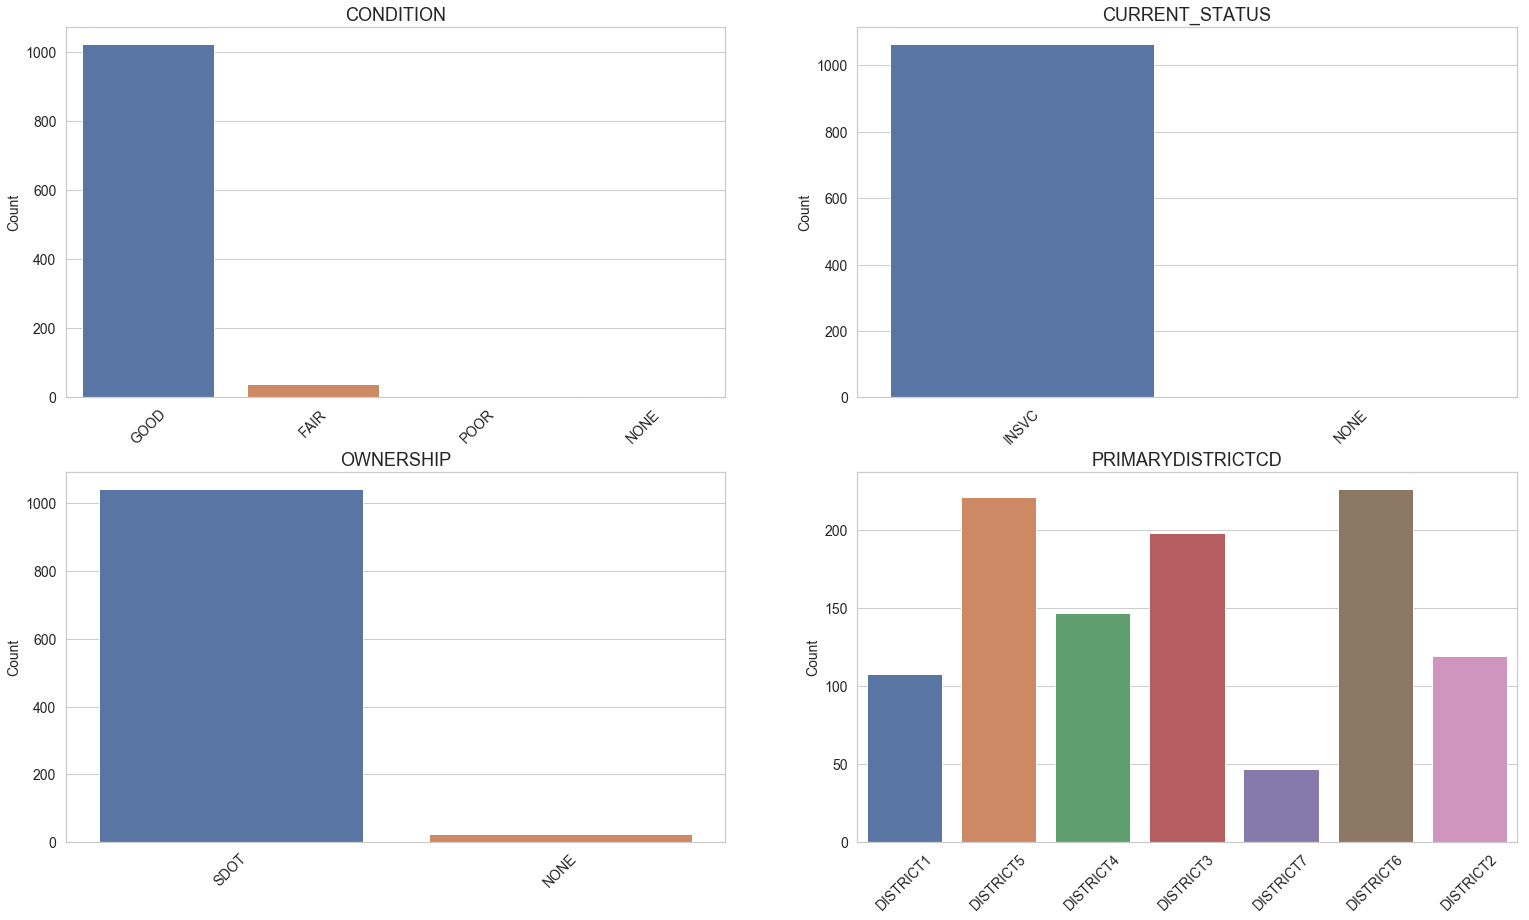

In [113]:
plot_four(['CONDITION', 'CURRENT_STATUS', 'OWNERSHIP', 'PRIMARYDISTRICTCD'])

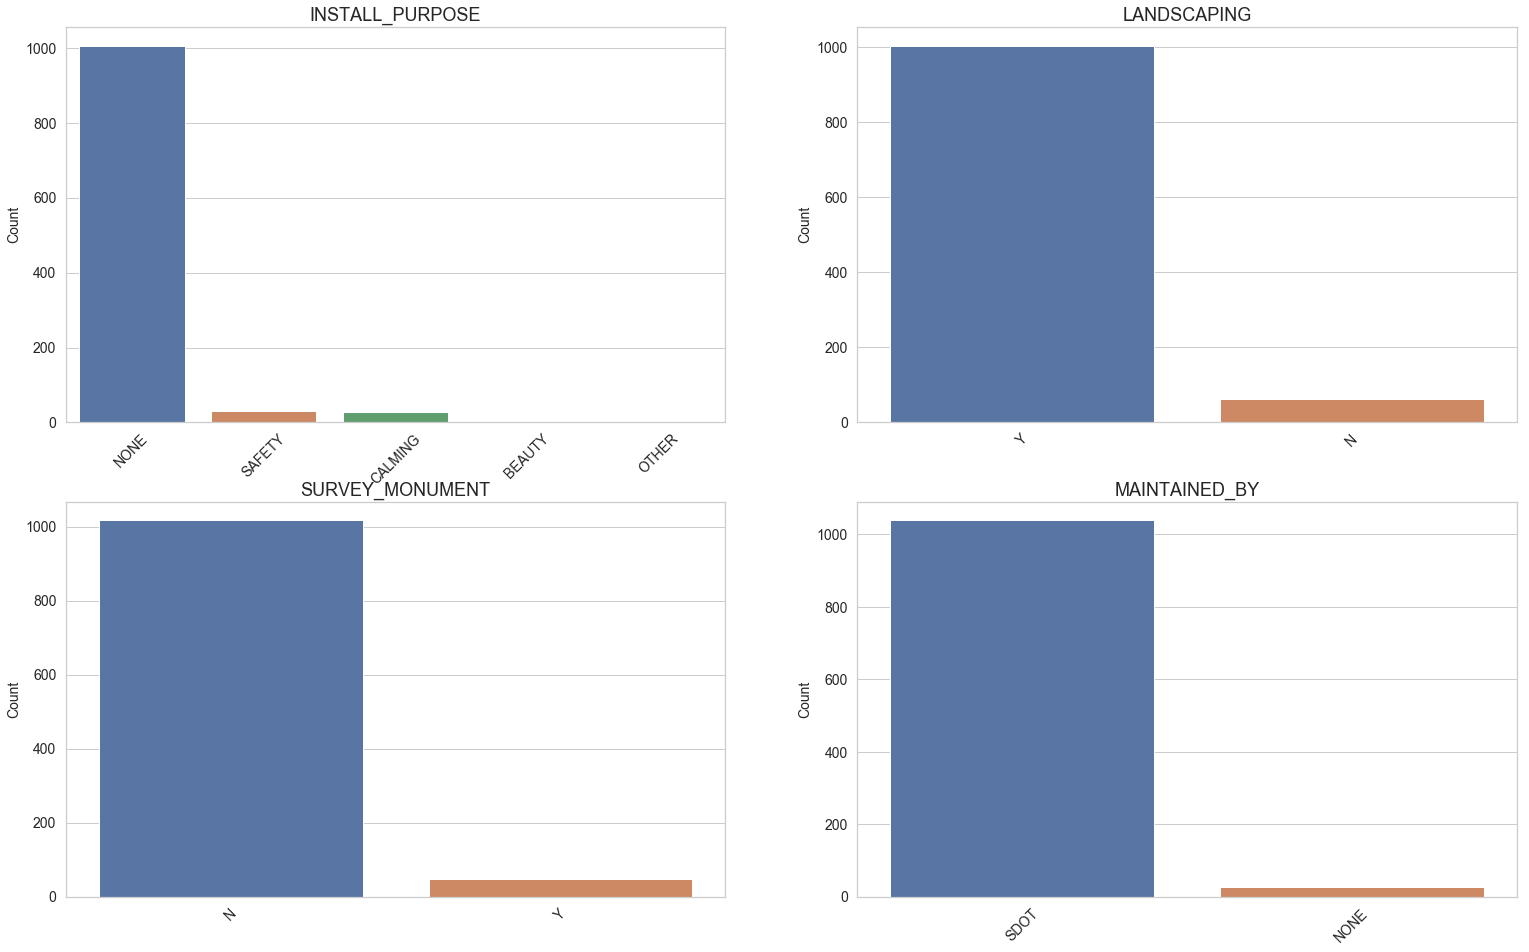

In [126]:
plot_four(['INSTALL_PURPOSE', 'LANDSCAPING', 'SURVEY_MONUMENT', 'MAINTAINED_BY'])

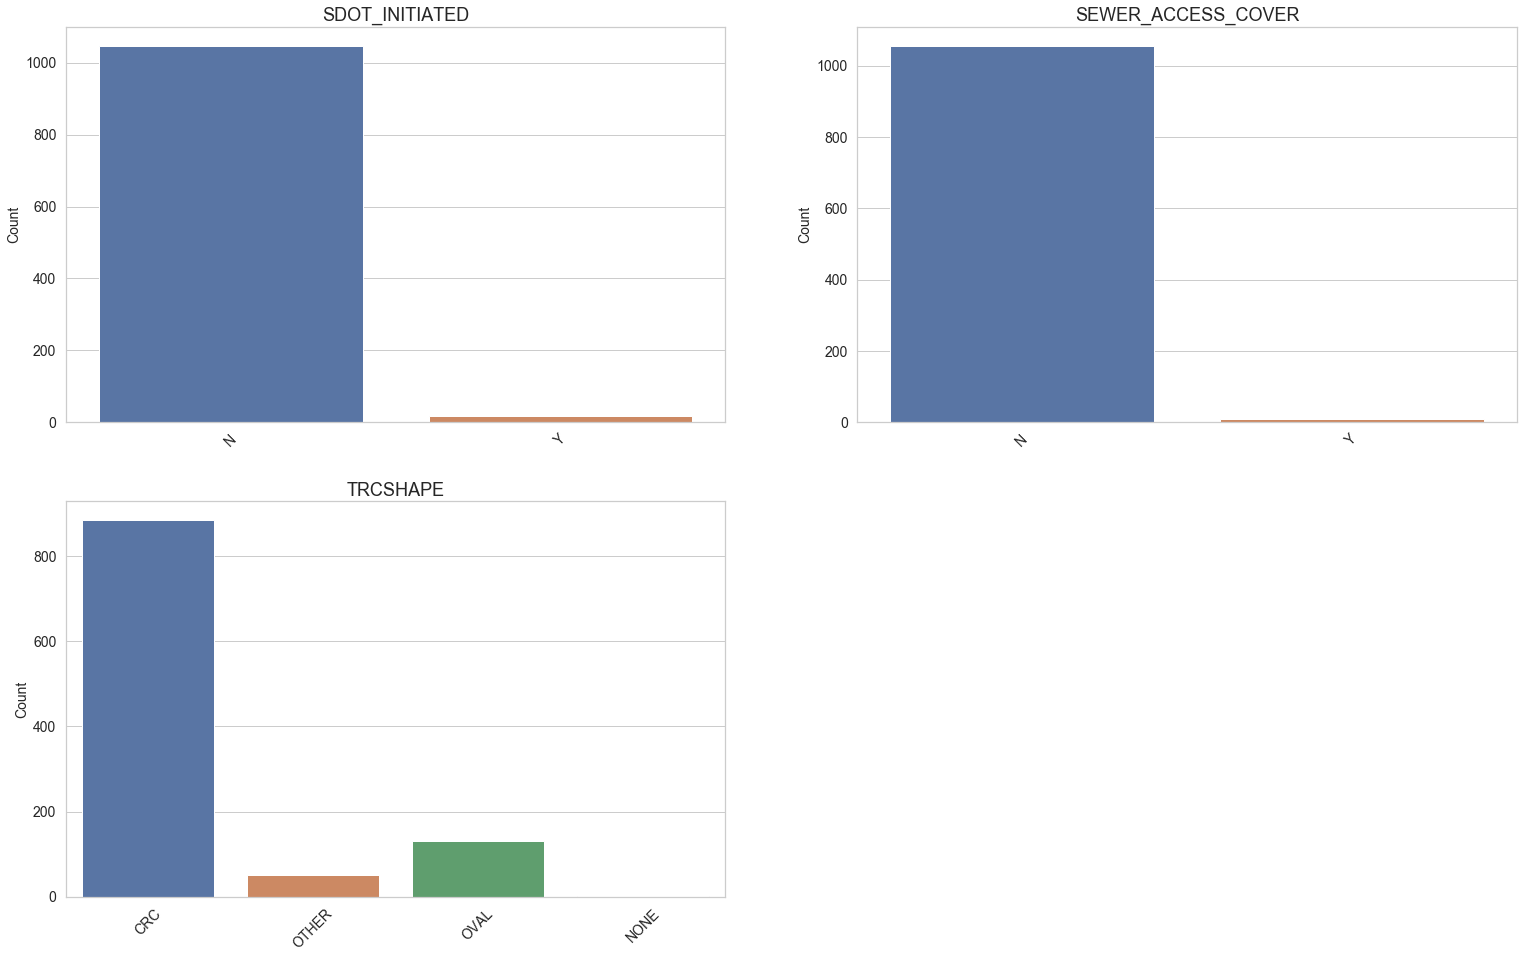

In [127]:
plot_four(['SDOT_INITIATED', 'SEWER_ACCESS_COVER',  'TRCSHAPE'])

In [128]:
# exploring number variables
for i in circles_df.columns:
    if circles_df[i].dtype == 'int64':
        print(i + ':')
        print('Nulls: {}'.format(circles_df[i].isna().sum()))
        print('Unique Values: {}'.format(len(circles_df[i].unique())))
        print('---')

OBJECTID:
Nulls: 0
Unique Values: 1066
---
COMPKEY:
Nulls: 0
Unique Values: 1066
---
COMPTYPE:
Nulls: 0
Unique Values: 1
---
INTKEY:
Nulls: 0
Unique Values: 1056
---
TRCSIZE:
Nulls: 0
Unique Values: 19
---


In [137]:
circles_df['TRCSIZE'].describe().round(2)

count    1066.00
mean        1.02
std         4.25
min         0.00
25%         0.00
50%         0.00
75%         0.00
max        35.00
Name: TRCSIZE, dtype: float64

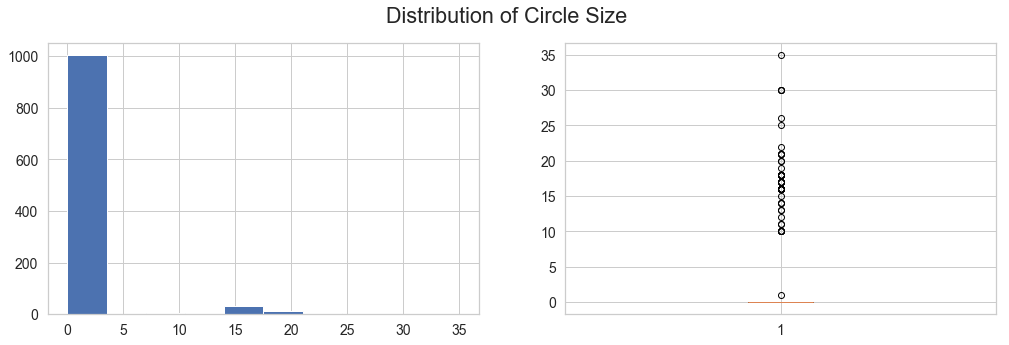

In [136]:
plt.figure(figsize=(17,5))
plt.suptitle('Distribution of Circle Size')

plt.subplot(1,2,1)
plt.hist(circles_df['TRCSIZE'])

plt.subplot(1,2,2)
plt.boxplot(circles_df['TRCSIZE']);

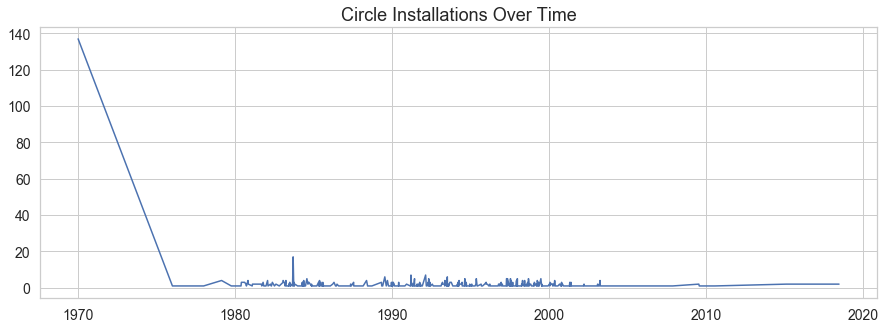

In [142]:
plt.figure(figsize=(15,5))
plt.plot(circles_df.groupby('INSTALL_DATE')['OBJECTID'].count())
plt.title('Circle Installations Over Time');

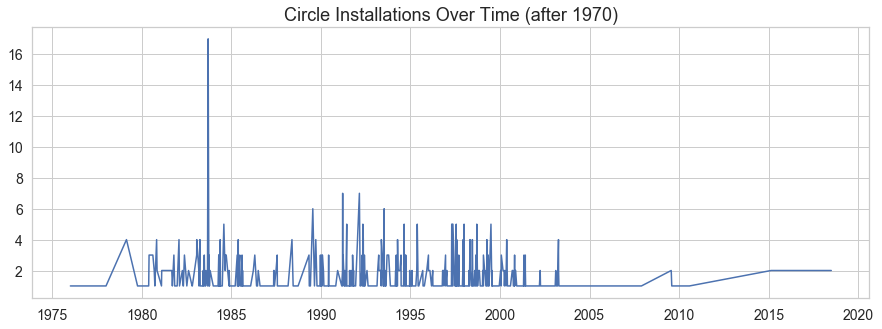

In [144]:
plt.figure(figsize=(15,5))
plt.plot(circles_df[circles_df['INSTALL_DATE'].dt.year > 1970].groupby('INSTALL_DATE')['OBJECTID'].count())
plt.title('Circle Installations Over Time (after 1970)');

In [184]:
# looking for duplicate keys
circles_df.groupby('INTKEY')['OBJECTID'].count().sort_values().tail(15)

INTKEY
27802    1
27838    1
27845    1
27262    1
27240    1
27847    2
30140    2
32493    2
33531    2
32296    2
36723    2
30003    2
34673    2
37770    2
25429    2
Name: OBJECTID, dtype: int64

In [177]:
circles_df[circles_df.INTKEY == 25429]

,X,Y,OBJECTID,COMPKEY,UNITID,UNITDESC,CONDITION,CONDITION_ASSESSMENT_DATE,CURRENT_STATUS,OWNERSHIP,...,OVERRIDEYN,OWNERSHIP_DATE,SDOT_INITIATED,SEWER_ACCESS_COVER,TRCSIZE,SURVEY_MONUMENT,TRCSHAPE,UNITTYPE,SHAPE_LNG,SHAPE_LAT
707,1.262160e+06,247397.246449,713,509084,TRC-804,9TH AVE NW AND NW 54TH ST ...,GOOD,2009-09-04 00:00:00+00:00,INSVC,SDOT,...,N,1970-01-01 00:00:00+00:00,N,N,0,N,CRC,TRC,-122.368606,47.667885
708,1.262160e+06,247397.246449,714,509085,TRC-803,9TH AVE NW AND NW 54TH ST ...,GOOD,2009-07-16 00:00:00+00:00,INSVC,SDOT,...,N,1970-01-01 00:00:00+00:00,N,N,0,N,CRC,TRC,-122.368606,47.667885


In [183]:
circles_df[circles_df.INTKEY == 37770]

,X,Y,OBJECTID,COMPKEY,UNITID,UNITDESC,CONDITION,CONDITION_ASSESSMENT_DATE,CURRENT_STATUS,OWNERSHIP,...,OVERRIDEYN,OWNERSHIP_DATE,SDOT_INITIATED,SEWER_ACCESS_COVER,TRCSIZE,SURVEY_MONUMENT,TRCSHAPE,UNITTYPE,SHAPE_LNG,SHAPE_LAT
439,1.276876e+06,255626.80185,442,509339,TRC-234,17TH AVE NE AND NE 86TH ST ...,GOOD,2009-09-04 00:00:00+00:00,INSVC,SDOT,...,N,1970-01-01 00:00:00+00:00,N,N,0,N,CRC,TRC,-122.30953,47.691232
440,1.276876e+06,255626.80185,443,509340,TRC-233,17TH AVE NE AND NE 86TH ST ...,GOOD,2009-09-04 00:00:00+00:00,INSVC,SDOT,...,N,1970-01-01 00:00:00+00:00,N,N,0,N,OVAL,TRC,-122.30953,47.691232
